## Loan status prediction 

In [62]:
# importing labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

## EDA - Exploratory Data Analysis

In [63]:
# reading the dataset
data = pd.read_csv("LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [64]:
data.shape

(614, 13)

In [65]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
data.duplicated().sum()

0

In [67]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [68]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [69]:
data.describe(include=[object])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002600,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [70]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handlling missing values

In [71]:
# for categorical columns
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# for numerical column
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [72]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

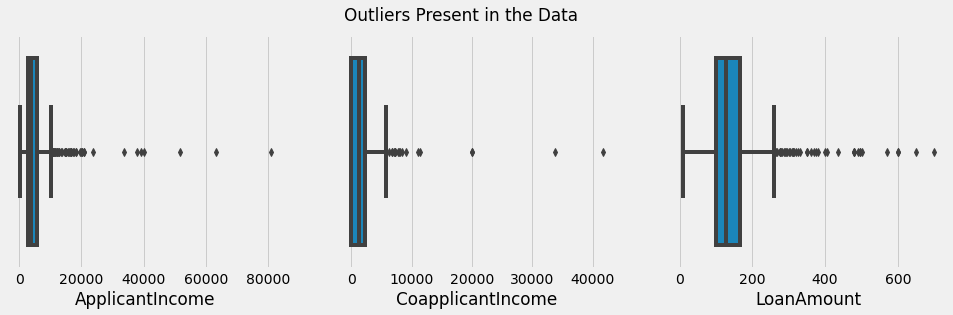

In [73]:
#visualizing the outlier using boxplot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers Present in the Data')
plt.show()

In [74]:
# lets remove the outliers from the data

#lets check the shape before removing outliers
print("Before Removing Outliers ", data.shape)

# lets filter the customers having more than 25000 income
data = data[data['ApplicantIncome'] < 25000]
data = data[data['CoapplicantIncome'] < 13000]
data = data[data['LoanAmount'] < 400]

#lets check the shape after removing outliers
print("After Removing Outliers ", data.shape)

Before Removing Outliers  (614, 13)
After Removing Outliers  (591, 13)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

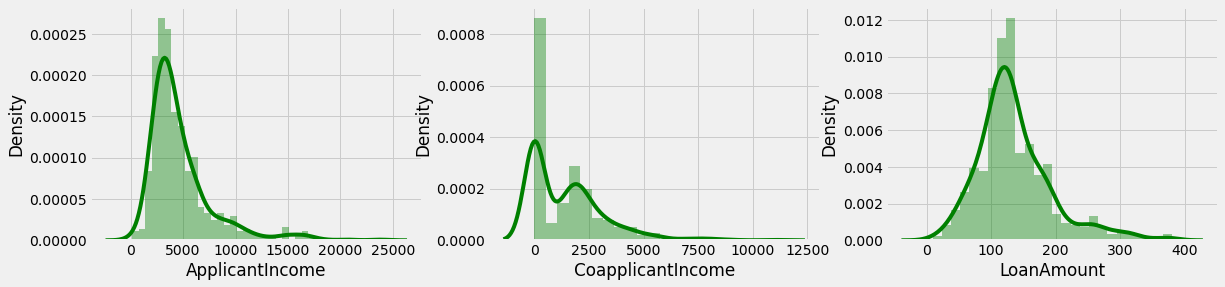

In [75]:
# univariate analysis on numerical column
plt.rcParams['figure.figsize'] = (18, 4)

plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color='green')

plt.subplot(1, 3, 2)
sns.distplot(data['CoapplicantIncome'], color='green')

plt.subplot(1, 3, 3)
sns.distplot(data['LoanAmount'], color = 'green')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

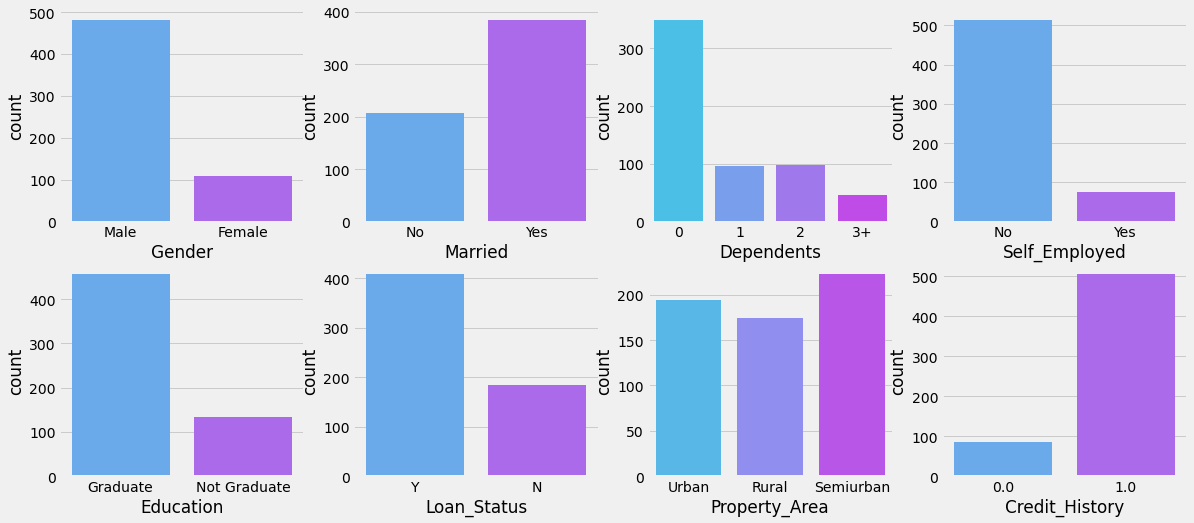

In [76]:
# univariate analysis on categorical columns
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(2, 4, 1)
sns.countplot(data['Gender'], palette='cool')

plt.subplot(2, 4, 2)
sns.countplot(data['Married'], palette='cool')

plt.subplot(2, 4, 3)
sns.countplot(data['Dependents'], palette='cool')

plt.subplot(2, 4, 4)
sns.countplot(data['Self_Employed'], palette='cool')

plt.subplot(2, 4, 5)
sns.countplot(data['Education'], palette='cool')

plt.subplot(2, 4, 6)
sns.countplot(data['Loan_Status'], palette='cool')

plt.subplot(2, 4, 7)
sns.countplot(data['Property_Area'], palette='cool')

plt.subplot(2, 4, 8)
sns.countplot(data['Credit_History'], palette='cool')

In [77]:
# Bivariate analysis 
### Lets check the Impact of Income of Applicant and Co-applicant on Loan Status


### Comparing Categorical data with target column

In [78]:
print('Impact of marriage on Loan Status')
print(pd.crosstab(data['Loan_Status'], data['Married']))
print('\n')

print('Impact of Gender on Loan Status')
print(pd.crosstab(data['Loan_Status'], data['Gender']))
print('\n')

print('Impact of self_employed on Loan Status')
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
print('\n')

print("Impact of Dependents on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Dependents']))
print('\n')

print("Impact of Property on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Impact of marriage on Loan Status
Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


Impact of Gender on Loan Status
Gender       Female  Male
Loan_Status              
N                36   147
Y                73   335


Impact of self_employed on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            110  34  24  15
Y            240  63  74  31


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


## Data Preparation

In [79]:
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [80]:
data = data.drop(['Loan_ID'], axis = 1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
print(data['Gender'].unique(),
data['Married'].unique(),
data['Dependents'].unique(),
data['Education'].unique(),
data['Self_Employed'].unique(),
data['Property_Area'].unique(),
data['Loan_Status'].unique())

['Male' 'Female'] ['No' 'Yes'] ['0' '1' '2' '3+'] ['Graduate' 'Not Graduate'] ['No' 'Yes'] ['Urban' 'Rural' 'Semiurban'] ['Y' 'N']


## Converting the categorical data to numerical 

In [88]:
print(data['Gender'].unique(),
data['Married'].unique(),
data['Dependents'].unique(),
data['Education'].unique(),
data['Self_Employed'].unique(),
data['Property_Area'].unique(),
data['Loan_Status'].unique())

[1 0] [0 1] [0 1 2 3] [0 1] [0 1] [2 0 1] [1 0]


In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [21]:
x = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

In [23]:
print('LogisticRegression', cross_val_score(LogisticRegression(), x_train, y_train))
print("SVC", cross_val_score(SVC(), x_train, y_train))
print('RandomForestClassifier',cross_val_score(RandomForestClassifier(n_estimators=60), x_train, y_train))
print("GradientBoostingClassifier", cross_val_score(GradientBoostingClassifier(), x_train, y_train))

LogisticRegression [0.75       0.875      0.79166667 0.86956522 0.86956522]
SVC [0.70833333 0.70833333 0.70833333 0.73913043 0.69565217]
RandomForestClassifier [0.75       0.875      0.79166667 0.82608696 0.86956522]
GradientBoostingClassifier [0.70833333 0.66666667 0.66666667 0.86956522 0.91304348]


0.8033826638477801
[[ 71  78]
 [ 15 309]]
              precision    recall  f1-score   support

           0       0.83      0.48      0.60       149
           1       0.80      0.95      0.87       324

    accuracy                           0.80       473
   macro avg       0.81      0.72      0.74       473
weighted avg       0.81      0.80      0.79       473



<AxesSubplot:>

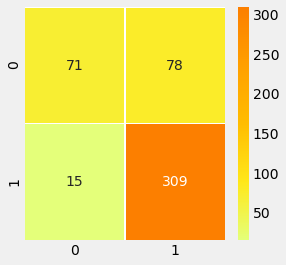

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
print(classification_report(y_test, y_pred))
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(cm1, annot=True, linewidth = 0.2, cmap = 'Wistia', fmt='.8g')

              precision    recall  f1-score   support

           0       0.84      0.46      0.59       149
           1       0.79      0.96      0.87       324

    accuracy                           0.80       473
   macro avg       0.82      0.71      0.73       473
weighted avg       0.81      0.80      0.78       473



<AxesSubplot:>

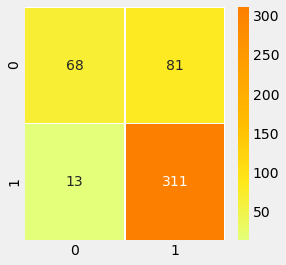

In [24]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)
cm1 = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(cm1, annot=True, linewidth = 0.5, cmap = 'Wistia', fmt='.8g')

0.7780126849894292
[[ 66  83]
 [ 22 302]]
              precision    recall  f1-score   support

           0       0.75      0.44      0.56       149
           1       0.78      0.93      0.85       324

    accuracy                           0.78       473
   macro avg       0.77      0.69      0.70       473
weighted avg       0.77      0.78      0.76       473



<AxesSubplot:>

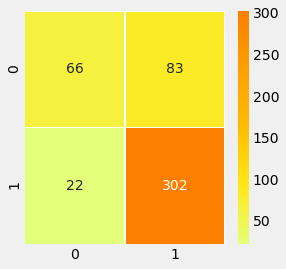

In [33]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print(accuracy_score(y_test, y_pred))
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)
print(classification_report(y_test, y_pred))
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(cm2, annot=True, linewidth = 0.5, cmap = 'Wistia', fmt='.8g')

## Dumping our model and using it to predict new model

In [34]:
import joblib

In [35]:
joblib.dump(gb, open('gbmodel.h5', 'wb'))

In [36]:
joblib.dump(rf, open('rfmodel.h5', 'wb'))

In [38]:
rfmodel= joblib.load(open('rfmodel.h5', 'rb'))

In [54]:
new_values =x.head(1).values

In [55]:
new_values.shape

(1, 11)

In [56]:
new_values.reshape(1,-1)

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.849e+03,
        0.000e+00, 1.280e+02, 3.600e+02, 1.000e+00, 2.000e+00]])

In [59]:
rfmodel.predict(new_values)

array([1])

In [60]:
rf.predict(new_values)

array([1])

In [61]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 591, dtype: int32